<font size=4 color=black >machine learning</font>

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error, make_scorer
from sklearn.metrics import r2_score as r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import lightgbm as lgb

<font size=3 color=black > data prepare </font>

In [36]:
def show_feature_importance_linear(model):

    importances = abs(model.coef_)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("{}, Feature: {}, Importance: {}".format(f + 1, X.columns[indices[f]], importances[indices[f]]))
    # Plot the feature importances of the forest
    
    
    plt.figure(figsize=(10,5))
    fig, ax = plt.subplots()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.grid(color='#A9A9A9', linestyle='--', linewidth=1, alpha=0.3,axis= 'x')
    plt.title("Feature importances_UK_Linear Regression",fontsize=14)
    plt.barh(range(X.shape[1]), importances[indices], color="#FFFFFF", align="center",hatch='////',edgecolor='black',linestyle='-',linewidth = 1)
    plt.yticks(range(X.shape[1]),  X.columns[indices],fontsize = 13)
    #plt.xlim([-1, X.shape[1]])
    plt.show()

In [37]:
def show_feature_importance_dec(model):

    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("{}, Feature: {}, Importance: {}".format(f + 1, X.columns[indices[f]], importances[indices[f]]))

    # Plot the feature importances of the forest
#     fig, ax = plt.subplots()
#     ax.spines['right'].set_visible(False)
#     ax.spines['top'].set_visible(False)
    plt.figure(figsize=(10,5))
    fig, ax = plt.subplots()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.grid(color='#A9A9A9', linestyle='--', linewidth=1, alpha=0.3,axis= 'x')
    plt.title("Feature importances_UK_Decision Tree Regression",fontsize=14)
    plt.barh(range(X.shape[1]), importances[indices], color="#FFFFFF", align="center",hatch='////',edgecolor='black',linestyle='-',linewidth = 1)
    plt.yticks(range(X.shape[1]),  X.columns[indices],fontsize = 13)
    #plt.xlim([-1, X.shape[1]])
    plt.show()

In [38]:
def show_feature_importance_knn(model):

    result = permutation_importance(model, X, y, scoring='neg_mean_squared_error')#neg_mean_squared_error
    importances = result.importances_mean
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("{}, Feature: {}, Importance: {}".format(f + 1, X.columns[indices[f]], importances[indices[f]]))
    plt.figure(figsize=(10,5))
    fig, ax = plt.subplots()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.grid(color='#A9A9A9', linestyle='--', linewidth=1, alpha=0.3,axis= 'x')
    plt.title("Feature importances_UK_KNeighbor Regression",fontsize=14)
    plt.barh(range(X.shape[1]), importances[indices], color="#FFFFFF", align="center",hatch='////',edgecolor='black',linestyle='-',linewidth = 1)
    plt.yticks(range(X.shape[1]),  X.columns[indices],fontsize = 13)
    #plt.xlim([-1, X.shape[1]])

In [39]:
def show_feature_importance_LGBMR(model):

    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("{}, Feature: {}, Importance: {}".format(f + 1, X.columns[indices[f]], importances[indices[f]]))

        plt.figure(figsize=(10,5))
    fig, ax = plt.subplots()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.grid(color='#A9A9A9', linestyle='--', linewidth=1, alpha=0.3,axis= 'x')
    plt.title("Feature importances_UK_LGBM Regressor",fontsize=14)
    plt.barh(range(X.shape[1]), importances[indices], color="#FFFFFF", align="center",hatch='////',edgecolor='black',linestyle='-',linewidth = 1)
    plt.yticks(range(X.shape[1]),  X.columns[indices],fontsize = 13)

Data preprocessing

In [40]:
data = pd.read_csv('./data_UK.csv')

In [41]:
data.drop([0])

,date,R_t-estimate,school_closing,cancel_public_events,restrictions_on_gatherings,internationaltravel,temperature,windspeed,full_vaccination,visible,new_deaths
1,2020/3/10,1.49,0,1,0,0,54.8,16.1,0.00,5.9,4
2,2020/3/11,1.48,0,1,0,0,51.9,12.8,0.00,6.7,0
3,2020/3/12,1.41,0,1,0,0,45.6,17.6,0.00,6.7,2
4,2020/3/13,1.24,0,1,0,0,47.0,11.0,0.00,8.2,1
5,2020/3/14,1.09,0,1,0,0,49.0,10.1,0.00,7.9,19
...,...,...,...,...,...,...,...,...,...,...,...
527,2021/8/18,1.51,1,1,4,3,65.0,9.1,129.92,6.3,111
528,2021/8/19,1.42,1,1,4,3,62.9,7.1,130.26,6.9,114
529,2021/8/20,1.13,1,1,4,3,63.5,6.1,130.60,6.5,114
530,2021/8/21,0.87,1,1,4,3,63.7,5.0,130.99,6.9,104


In [42]:
traindata=data.drop(['date'],axis=1)

In [43]:
traindata.describe()

,R_t-estimate,school_closing,cancel_public_events,restrictions_on_gatherings,internationaltravel,temperature,windspeed,full_vaccination,visible,new_deaths
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,1.069041,2.035714,1.084586,3.892857,2.112782,54.294737,7.478759,30.653120,6.373684,248.037594
std,0.401477,0.974555,0.278527,0.642050,1.062308,10.276135,3.186704,44.504767,0.844403,346.934846
min,0.130000,0.000000,1.000000,0.000000,0.000000,29.700000,1.600000,0.000000,1.500000,0.000000
25%,0.800000,1.000000,1.000000,4.000000,2.000000,46.800000,5.000000,0.000000,6.200000,18.000000
50%,1.070000,2.000000,1.000000,4.000000,2.000000,54.100000,7.000000,0.000000,6.500000,76.500000
75%,1.350000,3.000000,1.000000,4.000000,3.000000,62.725000,9.400000,58.515000,6.700000,374.500000
max,2.240000,3.000000,2.000000,4.000000,3.000000,82.800000,21.500000,131.220000,14.900000,1826.000000


<AxesSubplot:>

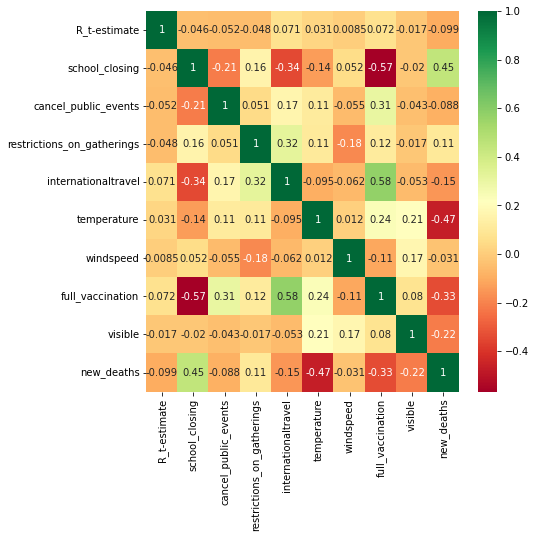

In [44]:
correlation_matrix = traindata.corr('pearson')
plt.figure(figsize=(7,7))
correlation_matrix_display = sns.heatmap(correlation_matrix,annot=True,cmap="RdYlGn")
correlation_matrix_display

In [45]:
y = traindata[["R_t-estimate"]]
X = traindata.drop(["R_t-estimate","new_deaths"],axis=1)

display(X.sample(5))

print(X.shape, y.shape)

,school_closing,cancel_public_events,restrictions_on_gatherings,internationaltravel,temperature,windspeed,full_vaccination,visible
13,3,1,0,0,44.3,9.6,0.00,6.6
104,3,1,4,2,63.0,10.7,0.00,6.7
188,1,1,4,2,64.9,7.3,0.00,6.5
480,1,2,4,3,65.9,4.9,115.17,5.9
33,3,1,4,0,61.6,4.2,0.00,5.9


(532, 8) (532, 1)


In [46]:
X_train, X_val, y_train, y_val = tts(X, y, test_size= 0.2, random_state=42, shuffle=True)

<font size=3 color=black >Dummy Regression</font>

In [47]:
dummy_regr = DummyRegressor()
dummy_regr.fit(X_train, y_train)
y_pre_dummy = dummy_regr.predict(X_val)
dummy_mse=mean_squared_error(y_val, y_pre_dummy)
dummy_r2=r2_score(y_val, y_pre_dummy)
dummy_mae = mean_absolute_error(y_val, y_pre_dummy)
print('dummy_mse=',dummy_mse)
print('dummy_r2=',dummy_r2)
print('dummy_mae=',dummy_mae)

dummy_mse= 0.1860927655039938
dummy_r2= -0.00017475898560737058
dummy_mae= 0.3499982407916437


<font size=3 color=black > Linear Regression</font>

In [48]:
model = LinearRegression()
# fit the model
model.fit(X_train, y_train["R_t-estimate"])
#rmsle = rmsle(y_val["R_t-estimate"], model.predict(X_val))
mse=mean_squared_error(y_val["R_t-estimate"], model.predict(X_val))
r2 = r2_score(y_val["R_t-estimate"], model.predict(X_val))
mae = mean_absolute_error (y_val["R_t-estimate"], model.predict(X_val))
print("Validation Infected set Mean_Squared_Error: {},R-Squared:{},mean_absolute_error:{}".format(mse,r2,mae))

Validation Infected set Mean_Squared_Error: 0.18638769372488334,R-Squared:-0.0017598811232002465,mean_absolute_error:0.3468201196552114


Feature ranking:
1, Feature: cancel_public_events, Importance: 0.12760651519181726
2, Feature: restrictions_on_gatherings, Importance: 0.04876045814054527
3, Feature: internationaltravel, Importance: 0.020805742467574138
4, Feature: school_closing, Importance: 0.008099584203446527
5, Feature: visible, Importance: 0.006347795882614114
6, Feature: temperature, Importance: 0.0035910197504560918
7, Feature: windspeed, Importance: 0.0023720816881537877
8, Feature: full_vaccination, Importance: 0.0005886976037854173


<Figure size 720x360 with 0 Axes>

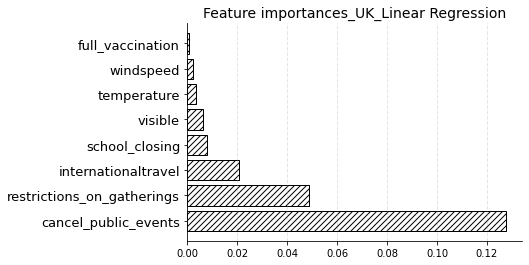

In [49]:
show_feature_importance_linear(model)

<font size=3 color=black > SVM Regression </font>

In [50]:
kfold = KFold(n_splits=3, shuffle=True)
parameters = {'kernel': (['rbf','sigmoid']), 'C':[0.1,1,10,100],'gamma': [1e-1,1e-2,1e-3,1e-4,1e-5],'epsilon':[0.1,0.2,0.3,0.4]}
svr = SVR()
clf = GridSearchCV(svr, parameters)#tune hyperparameter
clf.fit(X_train,y_train["R_t-estimate"])

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.2, 0.3, 0.4],
                         'gamma': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf', 'sigmoid']})

In [51]:
clf.best_params_

{'C': 1, 'epsilon': 0.2, 'gamma': 0.01, 'kernel': 'rbf'}

([<matplotlib.axis.XTick at 0x7fbf9df21da0>,
 [Text(0.0, 0, 'windspeed'),
  Text(1.0, 0, 'cancel_public_event'),
  Text(2.0, 0, 'restrictions_on_gatherings'),
  Text(3.0, 0, 'visible'),
  Text(4.0, 0, 'school_closing'),
  Text(5.0, 0, 'internationaltravel'),
  Text(6.0, 0, 'temperature'),
  Text(7.0, 0, 'full_vaccination')])

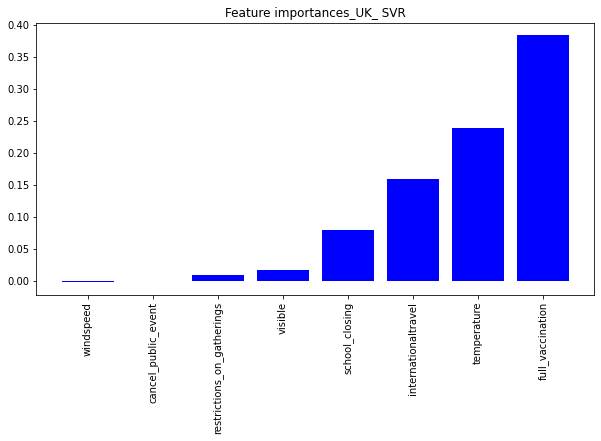

In [52]:
model = SVR(kernel = 'rbf', gamma = 1e-2, C = 1 , epsilon = 0.2)
model.fit(X_train,y_train["R_t-estimate"])
perm_importance = permutation_importance(model, X_val, y_val)

feature_names = ['school_closing','cancel_public_event','restrictions_on_gatherings','internationaltravel','temperature','windspeed','full_vaccination','visible']
#indices = np.argsort(perm_importance)[::-1]
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,5))
plt.title("Feature importances_UK_ SVR")
plt.bar(features[sorted_idx], perm_importance.importances_mean[sorted_idx],color="b",align="center")
plt.xticks(features[sorted_idx], features[sorted_idx], rotation='vertical')

In [53]:
mse=mean_squared_error(y_val["R_t-estimate"], model.predict(X_val))
r2 = r2_score(y_val["R_t-estimate"], model.predict(X_val))
mae = mean_absolute_error (y_val["R_t-estimate"], model.predict(X_val))
print("Validation Infected set Mean_Squared_Error: {},R-Squared:{},mean_absolute_error:{}".format(mse,r2,mae))

Validation Infected set Mean_Squared_Error: 0.12903652854140066,R-Squared:0.3064798704844597,mean_absolute_error:0.28037477685817747


<font size=3 color=black > DecisionTreeRegressor </font>

In [54]:
algorithm = DecisionTreeRegressor()
seed = 13
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
hp_candidates = [{"criterion": ["mse", "mae"],
              "max_depth": [1,2,3,4,5, 6,7, 8,9,10],
              "max_leaf_nodes": [5, 15,20,30, 40,50],
              "min_samples_leaf": [1, 2,3,4]
                     
              }]
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X_train,y_train["R_t-estimate"])
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.19423290415218944
DecisionTreeRegressor(criterion='mae', max_depth=6, max_leaf_nodes=20)
{'criterion': 'mae', 'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_leaf': 1}


In [55]:
model_dec = DecisionTreeRegressor(max_depth = 6, max_leaf_nodes = 20, min_samples_leaf = 1, criterion="mae")
model_dec.fit(X_train, y_train["R_t-estimate"])
mse=mean_squared_error(y_val["R_t-estimate"], model_dec.predict(X_val))
r2 = r2_score(y_val["R_t-estimate"], model_dec.predict(X_val))
mae = mean_absolute_error (y_val["R_t-estimate"], model_dec.predict(X_val))
print("Validation Infected set Mean_Squared_Error: {},R-Squared:{},mean_absolute_error:{}".format(mse,r2,mae))

Validation Infected set Mean_Squared_Error: 0.11384883177570093,R-Squared:0.3881077129803261,mean_absolute_error:0.27565420560747667


Feature ranking:
1, Feature: full_vaccination, Importance: 0.38323080428343514
2, Feature: temperature, Importance: 0.29642287537024437
3, Feature: school_closing, Importance: 0.11756664388243279
4, Feature: windspeed, Importance: 0.08863066757803614
5, Feature: internationaltravel, Importance: 0.05536568694463486
6, Feature: restrictions_on_gatherings, Importance: 0.03167008430166328
7, Feature: visible, Importance: 0.02711323763955345
8, Feature: cancel_public_events, Importance: 0.0


<Figure size 720x360 with 0 Axes>

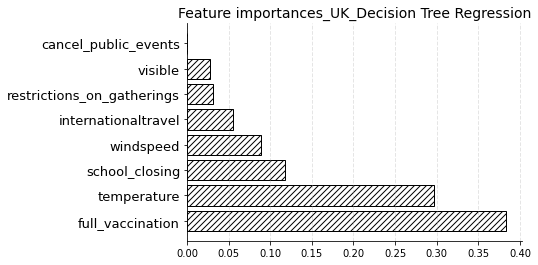

In [56]:
show_feature_importance_dec(model_dec)

<font size=3 color=black > KNeighborsRegressor </font>

In [57]:
algorithm = KNeighborsRegressor()
leaf_size = list(range(1,10))
n_neighbors = list(range(1,10))
p=[1,2]
weights= ['uniform','distance']
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p = p, weights = weights)
grid = GridSearchCV(estimator=algorithm, param_grid=hyperparameters, cv=kfold, scoring='r2')
grid.fit(X_train, y_train["R_t-estimate"])
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.27155235470412836
KNeighborsRegressor(leaf_size=9, n_neighbors=9, p=1, weights='distance')
{'leaf_size': 9, 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


In [58]:
model_knn = KNeighborsRegressor(leaf_size=9, n_neighbors=9, p=1, weights='distance')
model_knn.fit(X_train, y_train["R_t-estimate"])
result_knn = model_knn.predict(X_val)

In [59]:
mse_knn=mean_squared_error(y_val["R_t-estimate"], model_knn.predict(X_val))
r2_knn= r2_score(y_val["R_t-estimate"], model_knn.predict(X_val))
mae_knn = mean_absolute_error (y_val["R_t-estimate"], model_knn.predict(X_val))
print("Validation Infected set Mean_Squared_Error: {},R-Squared:{},mean_absolute_error:{}".format(mse_knn,r2_knn,mae_knn))

Validation Infected set Mean_Squared_Error: 0.14331252658105054,R-Squared:0.2297520468105223,mean_absolute_error:0.29326162738216427


In [60]:
model_knn = model_knn.fit(X, y["R_t-estimate"])

Feature ranking:
1, Feature: temperature, Importance: 0.1485193022451868
2, Feature: full_vaccination, Importance: 0.14452440972182423
3, Feature: windspeed, Importance: 0.07202639908165895
4, Feature: internationaltravel, Importance: 0.05460128937050575
5, Feature: school_closing, Importance: 0.04219541915442546
6, Feature: visible, Importance: 0.03493572041547356
7, Feature: cancel_public_events, Importance: 0.005790675928029266
8, Feature: restrictions_on_gatherings, Importance: 0.004991644490322027


<Figure size 720x360 with 0 Axes>

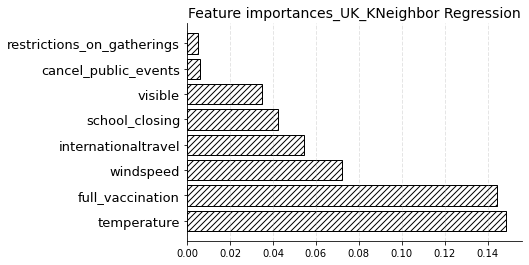

In [61]:
show_feature_importance_knn(model_knn)

<font size=3 color=black > LGBMRegressor </font>

In [62]:
params_test1 = [{'boosting_type':['gbdt', 'dart', 'goss', 'rf'],
                 'num_leaves':[5,10,20,30],'max_depth':[4,5,6,7,8,9,10], 
                 'learning_rate':[0.05,0.1,0.2,0.3],
                 'n_estimators':[30,40,50,60,70]}]
model_lgb = lgb.LGBMRegressor()
grid = GridSearchCV(estimator=model_lgb, param_grid=params_test1, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
grid.fit(X_train,y_train["R_t-estimate"])#tune hyperparameter
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

Fitting 5 folds for each of 2240 candidates, totalling 11200 fits
-0.11180756858195895
LGBMRegressor(boosting_type='dart', max_depth=10, n_estimators=40,
              num_leaves=20)
{'boosting_type': 'dart', 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 40, 'num_leaves': 20}


/opt/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [-0.13078183 -0.12372609 -0.12369909 ...         nan         nan
         nan]
  category=UserWarning


In [63]:
model = lgb.LGBMRegressor(boosting_type='dart', num_leaves = 20,
                                learning_rate=0.1, n_estimators=40, max_depth=10,
                                metric='rmse')

model.fit(X, y["R_t-estimate"])

LGBMRegressor(boosting_type='dart', max_depth=10, metric='rmse',
              n_estimators=40, num_leaves=20)

Feature ranking:
1, Feature: temperature, Importance: 210
2, Feature: full_vaccination, Importance: 193
3, Feature: windspeed, Importance: 130
4, Feature: visible, Importance: 108
5, Feature: school_closing, Importance: 43
6, Feature: internationaltravel, Importance: 29
7, Feature: restrictions_on_gatherings, Importance: 0
8, Feature: cancel_public_events, Importance: 0


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

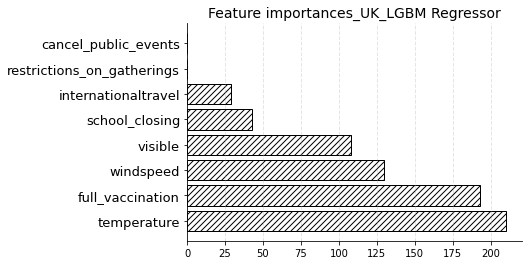

In [64]:
show_feature_importance_LGBMR(model)

In [65]:
mse=mean_squared_error(y_val["R_t-estimate"], model.predict(X_val))
r2 = r2_score(y_val["R_t-estimate"], model.predict(X_val))
mae = mean_absolute_error (y_val["R_t-estimate"], model.predict(X_val))
print("Validation Infected set Mean_Squared_Error: {},R-Squared:{},mean_absolute_error:{}".format(mse,r2,mae))

Validation Infected set Mean_Squared_Error: 0.07836451466689537,R-Squared:0.5788218345956921,mean_absolute_error:0.22668166817675586
